## Predictors of Bivalent Vaccine Uptake at the County Level

In this notebook, we look at the availability of vaccination clinics and compare it COVID bivalent vaccine uptake within each of the U.S. counties.

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.colors import ListedColormap
from tableone import TableOne
import geopandas as gpd
import statsmodels.formula.api as sm

In [90]:
date_list = ["03/15/2023"]
year_list = [2020]

In [91]:
fips_to_state = {
    "01": "AL",
    # "02": "AK",
    "04": "AZ",
    "05": "AR",
    "06": "CA",
    "08": "CO",
    "09": "CT",
    "10": "DE",
    "11": "DC",
    "12": "FL",
    "13": "GA",
    # "15": "HI",
    "16": "ID",
    "17": "IL",
    "18": "IN",
    "19": "IA",
    "20": "KS",
    "21": "KY",
    "22": "LA",
    "23": "ME",
    "24": "MD",
    "25": "MA",
    "26": "MI",
    "27": "MN",
    "28": "MS",
    "29": "MO",
    "30": "MT",
    "31": "NE",
    "32": "NV",
    "33": "NH",
    "34": "NJ",
    "35": "NM",
    "36": "NY",
    "37": "NC",
    "38": "ND",
    "39": "OH",
    "40": "OK",
    "41": "OR",
    "42": "PA",
    "44": "RI",
    "45": "SC",
    "46": "SD",
    "47": "TN",
    "48": "TX",
    "49": "UT",
    "50": "VT",
    "51": "VA",
    "53": "WA",
    "54": "WV",
    "55": "WI",
    "56": "WY",
}

In [92]:
ipums_to_demo = {
    "GEOID": "GEOID",
    "ALT0E001": "total_age",
    "ALT0E002": "male",
    "ALT0E003": "male_under_5",
    "ALT0E004": "male_5_to_9",
    "ALT0E005": "male_10_to_14",
    "ALT0E006": "male_15_to_17",
    "ALT0E007": "male_18_and_19",
    "ALT0E008": "male_20",
    "ALT0E009": "male_21",
    "ALT0E010": "male_22_to_24",
    "ALT0E011": "male_25_to_29",
    "ALT0E012": "male_30_to_34",
    "ALT0E013": "male_35_to_39",
    "ALT0E014": "male_40_to_44",
    "ALT0E015": "male_45_to_49",
    "ALT0E016": "male_50_to_54",
    "ALT0E017": "male_55_to_59",
    "ALT0E018": "male_60_and_61",
    "ALT0E019": "male_62_to_64",
    "ALT0E020": "male_65_and_66",
    "ALT0E021": "male_67_to_69",
    "ALT0E022": "male_70_to_74",
    "ALT0E023": "male_75_to_79",
    "ALT0E024": "male_80_to_84",
    "ALT0E025": "male_85_years_and_over",
    "ALT0E026": "female",
    "ALT0E027": "female_under_5",
    "ALT0E028": "female_5_to 9",
    "ALT0E029": "female_10_to 14",
    "ALT0E030": "female_15_to 17",
    "ALT0E031": "female_18_and 19",
    "ALT0E032": "female_20",
    "ALT0E033": "female_21",
    "ALT0E034": "female_22_to_24",
    "ALT0E035": "female_25_to_29",
    "ALT0E036": "female_30_to_34",
    "ALT0E037": "female_35_to_39",
    "ALT0E038": "female_40_to_44",
    "ALT0E039": "female_45_to_49",
    "ALT0E040": "female_50_to_54",
    "ALT0E041": "female_55_to_59",
    "ALT0E042": "female_60_and_61",
    "ALT0E043": "female_62_to_64",
    "ALT0E044": "female_65_and_66",
    "ALT0E045": "female_67_to_69",
    "ALT0E046": "female_70_to_74",
    "ALT0E047": "female_75_to_79",
    "ALT0E048": "female_80_to_84",
    "ALT0E049": "female_85_years_and_over",
    "ALUCE001": "total_race",
    "ALUCE002": "white_alone",
    "ALUCE003": "black_or_african_american_alone",
    "ALUCE004": "american_indian_and_alaska_native_alone",
    "ALUCE005": "asian_alone",
    "ALUCE006": "native_hawaiian_and_other_pacific_islander_alone",
    "ALUCE007": "some_other_race_alone",
    "ALUCE008": "two_or_more_races",
    "ALUCE009": "two_or_more_races_two_races_including_some_other_race",
    "ALUCE010": "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE001": "total_hispanic",
    "ALUKE002": "not_hispanic_or_latino",
    "ALUKE003": "not_hispanic_or_latino_white_alone",
    "ALUKE004": "not_hispanic_or_latino_black_or_african_american_alone",
    "ALUKE005": "not_hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE006": "not_hispanic_or_latino_asian_alone",
    "ALUKE007": "not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE008": "not_hispanic_or_latino_some_other_race_alone",
    "ALUKE009": "not_hispanic_or_latino_two_or_more_races",
    "ALUKE010": "not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE011": "not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALUKE012": "hispanic_or_latino",
    "ALUKE013": "hispanic_or_latino_white_alone",
    "ALUKE014": "hispanic_or_latino_black_or_african_american_alone",
    "ALUKE015": "hispanic_or_latino_american_indian_and_alaska_native_alone",
    "ALUKE016": "hispanic_or_latino_asian_alone",
    "ALUKE017": "hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "ALUKE018": "hispanic_or_latino_some_other_race_alone",
    "ALUKE019": "hispanic_or_latino_two_or_more_races",
    "ALUKE020": "hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "ALUKE021": "hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "ALWGE001": "total_education",
    "ALWGE002": "no_schooling_completed",
    "ALWGE003": "nursery_school",
    "ALWGE004": "kindergarten",
    "ALWGE005": "1st_grade",
    "ALWGE006": "2nd_grade",
    "ALWGE007": "3rd_grade",
    "ALWGE008": "4th_grade",
    "ALWGE009": "5th_grade",
    "ALWGE010": "6th_grade",
    "ALWGE011": "7th_grade",
    "ALWGE012": "8th_grade",
    "ALWGE013": "9th_grade",
    "ALWGE014": "10th_grade",
    "ALWGE015": "11th_grade",
    "ALWGE016": "12th_grade_no_diploma",
    "ALWGE017": "regular_high_school_diploma",
    "ALWGE018": "GED_or_alternative_credential",
    "ALWGE019": "some_college_less_than_1_year",
    "ALWGE020": "some_college_1_or_more_years_no degree",
    "ALWGE021": "associate_degree",
    "ALWGE022": "bachelor_degree",
    "ALWGE023": "master_degree",
    "ALWGE024": "professional_school_degree",
    "ALWGE025": "doctorate_degree",
    "ALW1E001": "median_household_income_in_the_past_12_months",
}

In [93]:
age_demo = [
    "male",
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_and_61",
    "male_62_to_64",
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_and_61",
    "female_62_to_64",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over",
]

In [94]:
race_demo = [
    "white_alone",
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
    "two_or_more_races",
    "two_or_more_races_two_races_including_some_other_race",
    "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [95]:
hispanic_demo = [
    "not_hispanic_or_latino",
    "not_hispanic_or_latino_white_alone",
    "not_hispanic_or_latino_black_or_african_american_alone",
    "not_hispanic_or_latino_american_indian_and_alaska_native_alone",
    "not_hispanic_or_latino_asian_alone",
    "not_hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "not_hispanic_or_latino_some_other_race_alone",
    "not_hispanic_or_latino_two_or_more_races",
    "not_hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "not_hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
    "hispanic_or_latino",
    "hispanic_or_latino_white_alone",
    "hispanic_or_latino_black_or_african_american_alone",
    "hispanic_or_latino_american_indian_and_alaska_native_alone",
    "hispanic_or_latino_asian_alone",
    "hispanic_or_latino_native_hawaiian_and_other_pacific_islander_alone",
    "hispanic_or_latino_some_other_race_alone",
    "hispanic_or_latino_two_or_more_races",
    "hispanic_or_latino_two_or_more_races_two_races_including_some_other_race",
    "hispanic_or_latino_two_or_more_races_two_races_excluding_some_other_race_and_three_or_more_races",
]

In [96]:
education_demo = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree",
]

### import datasets

In [97]:
# import vaccine dataset from: https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh

vaccinations_raw = pd.read_csv(
    "../../data/county_level/COVID-19_Vaccinations_in_the_United_States_County.csv"
)

/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_31871/1044520792.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  vaccinations_raw = pd.read_csv(


In [98]:
# import flu locations dataset from: https://data.cdc.gov/Flu-Vaccinations/Vaccines-gov-Flu-vaccinating-provider-locations/bugr-bbfr

flu_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__Flu_vaccinating_provider_locations.csv"
)

/var/folders/z9/gdw88pxx7pnfg5bk987tzgqh0000gn/T/ipykernel_31871/1755238248.py:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  flu_locations_raw = pd.read_csv(


In [99]:
# import covid locations dataset from: https://data.cdc.gov/Vaccinations/Vaccines-gov-COVID-19-vaccinating-provider-locatio/5jp2-pgaw

covid_locations_raw = pd.read_csv(
    "../../data/county_level/Vaccines.gov__COVID-19_vaccinating_provider_locations.csv"
)

In [100]:
# import voting data from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ

voting_raw = pd.read_csv("../../data/county_level/countypres_2000-2020.csv")

In [101]:
# import demographic data from: https://usa.ipums.org/usa/index.shtml

demographics_raw = pd.read_csv(
    "../../data/county_level/nhgis0004_ds244_20195_county.csv", encoding="latin-1"
)

In [102]:
# import county-level shp files from: https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

us_map = gpd.read_file("../../data/map/usa/cb_2018_us_county_500k.shp")
alaska_map = gpd.read_file("../../data/map/alaska/tl_2018_02_cousub.shp")
hawaii_map = gpd.read_file("../../data/map/hawaii/tl_2016_15_cousub.shp")

In [103]:
# import urban-rural classification files from: https://www.cdc.gov/nchs/data_access/urban_rural.htm#Data_Files_and_Documentation

urban_rural_raw = pd.read_csv("../../data/county_level/NCHSURCodes2013.csv")

### data cleaning and manipulation

##### locations

In [104]:
# filter out locations with vaccines in stock

# flu_locations_stock = flu_locations_raw.loc[flu_locations_raw.in_stock == True]
# covid_locations_stock = covid_locations_raw.loc[covid_locations_raw.in_stock == True]

In [105]:
# exclude all locations outside 50 U.S. states

flu_locations_states = flu_locations_raw[
    flu_locations_raw["loc_admin_state"].isin(fips_to_state.values())
]
covid_locations_states = covid_locations_raw[
    covid_locations_raw["loc_admin_state"].isin(fips_to_state.values())
]

In [106]:
# drop duplicates from location datasets

flu_locations_dedup = flu_locations_states.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)
covid_locations_dedup = covid_locations_states.drop_duplicates(
    subset=["latitude", "longitude"], keep="first"
)

In [107]:
locations_cols_names = ["loc_name", "loc_admin_state", "latitude", "longitude"]

In [108]:
# filter column headers in locations datasets

flu_centers = flu_locations_dedup.loc[
    :, flu_locations_dedup.columns.isin(locations_cols_names)
]
covid_centers = covid_locations_dedup.loc[
    :, covid_locations_dedup.columns.isin(locations_cols_names)
]

In [109]:
# designate whether locations are flu-only, covid-only, or both

flu_centers.insert(0, "center", "flu")
covid_centers.insert(0, "center", "covid")

merged_centers = pd.merge(
    flu_centers,
    covid_centers,
    on=["latitude", "longitude"],
    how="outer",
    indicator=True,
)

merged_centers["center"] = merged_centers["_merge"].map(
    {"left_only": "flu", "right_only": "covid", "both": "both"}
)

merged_centers = merged_centers.loc[:, ["latitude", "longitude", "center"]]

In [110]:
# how many immunization centers total

len(merged_centers)

57697

In [111]:
# sanity check to validate number of centers and respective labels

(
    len(merged_centers.loc[merged_centers.center == "both"])
    + len(merged_centers.loc[merged_centers.center == "covid"])
    + len(merged_centers.loc[merged_centers.center == "flu"])
)

57697

In [112]:
# how many centers labeled as "both"

len(merged_centers.loc[merged_centers.center == "both"])

31150

In [113]:
# how many centers labeled as "covid only"

len(merged_centers.loc[merged_centers.center == "covid"])

26148

In [114]:
# how many centers labeled as "flu only"

len(merged_centers.loc[merged_centers.center == "flu"])

399

In [115]:
# create geodataframe with lat / long coordinates

gdf = gpd.GeoDataFrame(
    merged_centers,
    geometry=gpd.points_from_xy(merged_centers.longitude, merged_centers.latitude),
)

gdf = gdf.set_crs("epsg:4269")

centers = gdf.sjoin(us_map)

In [116]:
centers.head(1)

,latitude,longitude,center,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,34.008567,-96.382197,both,POINT (-96.38220 34.00857),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113


In [117]:
# group centers and sum by type

grouped_centers = centers.groupby(["GEOID"])
grouped_centers = pd.DataFrame(
    {
        "flu_only": grouped_centers.apply(lambda x: (x["center"] == "flu").sum()),
        "covid_only": grouped_centers.apply(lambda x: (x["center"] == "covid").sum()),
        "both": grouped_centers.apply(lambda x: (x["center"] == "both").sum()),
        "total_centers": grouped_centers.apply(lambda x: x.shape[0]),
    }
)

grouped_centers = grouped_centers.reset_index()

In [118]:
grouped_centers

,GEOID,flu_only,covid_only,both,total_centers
0,01001,0,3,4,7
1,01003,0,7,33,40
2,01005,0,6,2,8
3,01007,0,5,2,7
4,01009,0,8,3,11
...,...,...,...,...,...
2880,56037,0,2,5,7
2881,56039,0,1,3,4
2882,56041,0,3,3,6
2883,56043,0,3,0,3


##### vaccinations

In [119]:
# filter vaccination data to only U.S. 50 states and date

vaccinations = vaccinations_raw.loc[
    vaccinations_raw.Date.isin(date_list)
    & vaccinations_raw.Recip_State.isin(fips_to_state.values())
].reset_index(drop=True)

vaccinations = vaccinations[vaccinations.FIPS != "UNK"]

In [120]:
# filter and rename vaccination dataset column headers

vaccinations_col_map = {
    "FIPS": "GEOID",
    "Census2019": "census_2019",
    "Series_Complete_5Plus": "series_complete_5plus",
    "Series_Complete_12Plus": "series_complete_12plus",
    "Series_Complete_18Plus": "series_complete_18plus",
    "Series_Complete_65Plus": "series_complete_65plus",
    "Bivalent_Booster_5Plus": "bivalent_5plus",
    "Bivalent_Booster_12Plus": "bivalent_12plus",
    "Bivalent_Booster_18Plus": "bivalent_18plus",
    "Bivalent_Booster_65Plus": "bivalent_65plus",
    "Bivalent_Booster_5Plus_Pop_Pct": "bivalent_5plus_pct",
    "Bivalent_Booster_12Plus_Pop_Pct": "bivalent_12plus_pct",
    "Bivalent_Booster_18Plus_Pop_Pct": "bivalent_18plus_pct",
    "Bivalent_Booster_65Plus_Pop_Pct": "bivalent_65plus_pct",
}

vaccinations = vaccinations.rename(columns=vaccinations_col_map)

vaccinations = vaccinations.filter(vaccinations_col_map.values())

In [121]:
# how many counties are missing vaccine data

null_vaccinations = vaccinations[vaccinations["bivalent_5plus"].isnull()]
len(null_vaccinations)  # 8 california and 3 massachusetts counties

11

In [122]:
# calculate proportion of those vaccinated with bivalent and eligible as well as eligible per 100,000

vaccinations["bivalent_5plus_pct_elig"] = (
    vaccinations.bivalent_5plus / vaccinations.series_complete_5plus
) * 100
vaccinations["bivalent_12plus_pct_elig"] = (
    vaccinations.bivalent_12plus / vaccinations.series_complete_12plus
) * 100
vaccinations["bivalent_18plus_pct_elig"] = (
    vaccinations.bivalent_18plus / vaccinations.series_complete_18plus
) * 100
vaccinations["bivalent_65plus_pct_elig"] = (
    vaccinations.bivalent_65plus / vaccinations.series_complete_65plus
) * 100

vaccinations["bivalent_5plus_pct_elig_100k"] = (
    vaccinations.bivalent_5plus / vaccinations.series_complete_5plus
) * 100000
vaccinations["bivalent_12plus_pct_elig_100k"] = (
    vaccinations.bivalent_12plus / vaccinations.series_complete_12plus
) * 100000
vaccinations["bivalent_18plus_pct_elig_100k"] = (
    vaccinations.bivalent_18plus / vaccinations.series_complete_18plus
) * 100000
vaccinations["bivalent_65plus_pct_elig_100k"] = (
    vaccinations.bivalent_65plus / vaccinations.series_complete_65plus
) * 100000

In [123]:
# how many eligible adults have recieved bivalent vacine

vaccination_rate = (
    vaccinations.bivalent_18plus.sum() / vaccinations.series_complete_18plus.sum() * 100
)

vaccination_rate

24.975270474454845

In [124]:
# find min/max at county-level and state-level

county_min = vaccinations["bivalent_18plus_pct_elig"].min()
county_max = vaccinations["bivalent_18plus_pct_elig"].max()

state_totals = vaccinations.groupby(vaccinations["GEOID"].apply(lambda x: x[:2]))[
    ["bivalent_18plus", "series_complete_18plus"]
].sum()
state_totals_pct = (
    state_totals["bivalent_18plus"] / state_totals["series_complete_18plus"] * 100
)
state_min = state_totals_pct.min()
state_max = state_totals_pct.max()

print(f"County min vaccination percentage: {county_min}")
print(f"County max vaccination percentage: {county_max}")
print(f"State min vaccination percentage: {state_min}")
print(f"State max vaccination percentage: {state_max}")

County min vaccination percentage: 0.32102728731942215
County max vaccination percentage: 55.293728554301545
State min vaccination percentage: 12.881301030950866
State max vaccination percentage: 40.115119805506666


In [125]:
vaccinations

,GEOID,census_2019,series_complete_5plus,series_complete_12plus,series_complete_18plus,series_complete_65plus,bivalent_5plus,bivalent_12plus,bivalent_18plus,bivalent_65plus,...,bivalent_18plus_pct,bivalent_65plus_pct,bivalent_5plus_pct_elig,bivalent_12plus_pct_elig,bivalent_18plus_pct_elig,bivalent_65plus_pct_elig,bivalent_5plus_pct_elig_100k,bivalent_12plus_pct_elig_100k,bivalent_18plus_pct_elig_100k,bivalent_65plus_pct_elig_100k
0,29227,2013.0,858.0,853.0,833.0,384.0,200.0,200.0,199.0,141.0,...,12.3,27.0,23.310023,23.446659,23.889556,36.718750,23310.023310,23446.658851,23889.555822,36718.750000
1,01131,10373.0,5750.0,5652.0,5260.0,1790.0,624.0,624.0,620.0,380.0,...,7.8,18.1,10.852174,11.040340,11.787072,21.229050,10852.173913,11040.339703,11787.072243,21229.050279
2,48373,51353.0,25653.0,25355.0,24583.0,10267.0,5422.0,5392.0,5347.0,3475.0,...,13.0,35.7,21.135930,21.266022,21.750803,33.846304,21135.929521,21266.022481,21750.803401,33846.303691
3,28017,17103.0,8533.0,8430.0,8039.0,2730.0,826.0,824.0,814.0,489.0,...,6.3,16.3,9.680066,9.774614,10.125638,17.912088,9680.065628,9774.614472,10125.637517,17912.087912
4,46077,4939.0,3565.0,3485.0,3345.0,1362.0,1010.0,1000.0,984.0,670.0,...,26.0,57.8,28.330996,28.694405,29.417040,49.192364,28330.995792,28694.404591,29417.040359,49192.364170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3150,48233,20938.0,7476.0,7403.0,7132.0,2412.0,1057.0,1055.0,1044.0,660.0,...,6.7,18.4,14.138577,14.250979,14.638250,27.363184,14138.576779,14250.979333,14638.250140,27363.184080
3153,13317,9777.0,4873.0,4819.0,4623.0,1651.0,789.0,788.0,786.0,475.0,...,10.2,20.5,16.191258,16.351940,17.001947,28.770442,16191.257952,16351.940237,17001.946788,28770.442156
3154,48485,132230.0,70580.0,69379.0,65837.0,17496.0,10790.0,10702.0,10533.0,5603.0,...,10.3,28.2,15.287617,15.425417,15.998603,32.024463,15287.616889,15425.416913,15998.602609,32024.462734
3155,54067,24496.0,13276.0,13062.0,12411.0,4799.0,2839.0,2828.0,2800.0,1845.0,...,14.4,32.9,21.384453,21.650589,22.560632,38.445509,21384.453149,21650.589496,22560.631698,38445.509481


##### voting

In [126]:
# fix missing fips for DC

dc_fips = (voting_raw["state_po"] == "DC") & (voting_raw["county_fips"].isnull())

# Fill null values with "11001.0"
voting_raw.loc[dc_fips, "county_fips"] = "11001.0"

In [127]:
# filter voting datast to U.S. 50 states and calcualte proportion of county voting for Biden or Trump

voting_filter = voting_raw.loc[
    voting_raw.year.isin(year_list) & voting_raw.state_po.isin(fips_to_state.values())
].reset_index(drop=True)

voting_filter = voting_filter.rename(columns={"county_fips": "GEOID"})

In [128]:
# filter and calculate proportion of votes won by candidate

voting_filter = (
    voting_filter.groupby(["GEOID", "candidate", "totalvotes"])["candidatevotes"]
    .sum()
    .reset_index()
)

voting_filter["vote_pct"] = (
    voting_filter.candidatevotes / voting_filter.totalvotes
) * 100

In [129]:
# reshaping voting dataset

voting_pivot = pd.pivot_table(
    voting_filter, values="vote_pct", index="GEOID", columns="candidate", fill_value=0
).reset_index()

voting = voting_pivot.rename(
    columns={
        "DONALD J TRUMP": "trump",
        "JOSEPH R BIDEN JR": "biden",
        "JO JORGENSEN": "jorgensen",
        "OTHER": "other",
    }
)

voting.columns.name = None

In [130]:
# fix the geo ids in the dataset to object form

voting["GEOID"] = voting["GEOID"].astype(str).str.split(".", n=1).str[0]


def add_zero(x):
    if len(x) == 4:
        return "0" + x
    else:
        return x


voting["GEOID"] = voting["GEOID"].apply(add_zero)

In [131]:
# calculate winner for each county

voting["winner"] = voting.apply(
    lambda x: "trump" if x["trump"] > x["biden"] else "biden", axis=1
)

In [132]:
# set coding for map

voting["winner_coded"] = voting.apply(
    lambda x: -x["trump"] if x["winner"] == "trump" else x["biden"], axis=1
)

In [133]:
voting

,GEOID,trump,jorgensen,biden,other,winner,winner_coded
0,01001,71.436802,0.000000,27.018365,1.544833,trump,-71.436802
1,01003,76.171373,0.000000,22.409030,1.419597,trump,-76.171373
2,01005,53.451226,0.000000,45.788173,0.760601,trump,-53.451226
3,01007,78.426264,0.000000,20.698280,0.875456,trump,-78.426264
4,01009,89.571553,0.000000,9.569378,0.859069,trump,-89.571553
...,...,...,...,...,...,...,...
3104,56039,29.356868,1.724488,66.599040,2.319605,biden,66.599040
3105,56041,79.247278,1.818374,16.819960,2.114388,trump,-79.247278
3106,56043,80.481151,1.612103,16.145833,1.760913,trump,-80.481151
3107,56045,87.275281,1.292135,10.112360,1.320225,trump,-87.275281


##### demographics

In [134]:
# filter demographics dataset

demographics_raw["GEOID"] = demographics_raw["GEOID"].str.replace("05000US", "")
demographics_filter = demographics_raw.loc[
    demographics_raw.STUSAB.isin(fips_to_state.values())
]
demographics = demographics_filter.rename(columns=ipums_to_demo)
demographics = demographics.filter(ipums_to_demo.values())

In [135]:
# calculate proportions for each demographic variable (i.e., % of county idenitfying as White)

demographics[age_demo] = (
    demographics[age_demo].div(demographics.total_age, axis=0)
) * 100
demographics[race_demo] = (
    demographics[race_demo].div(demographics.total_race, axis=0)
) * 100
demographics[hispanic_demo] = (
    demographics[hispanic_demo].div(demographics.total_hispanic, axis=0)
) * 100
demographics[education_demo] = (
    demographics[education_demo].div(demographics.total_education, axis=0)
) * 100

In [136]:
# simplify race as white vs non white

white_alone = ["white_alone"]

not_white_alone = [
    "black_or_african_american_alone",
    "american_indian_and_alaska_native_alone",
    "asian_alone",
    "native_hawaiian_and_other_pacific_islander_alone",
    "some_other_race_alone",
    "two_or_more_races",
    "two_or_more_races_two_races_including_some_other_race",
    "two or more races_two_races_excluding_some_other_race_and_three_or_more_races",
]

demographics["white_alone"] = demographics.loc[:, white_alone].sum(axis=1)
demographics["not_white_alone"] = demographics.loc[:, not_white_alone].sum(axis=1)

In [137]:
# simplify ethnicty as hispanic vs non hispanic

hispanic = ["hispanic_or_latino"]

non_hispanic = ["not_hispanic_or_latino"]

demographics["hispanic"] = demographics.loc[:, hispanic].sum(axis=1)
demographics["non_hispanic"] = demographics.loc[:, non_hispanic].sum(axis=1)

In [138]:
# simplify age as below or above 60 years old

age_over_65 = [
    "male_65_and_66",
    "male_67_to_69",
    "male_70_to_74",
    "male_75_to_79",
    "male_80_to_84",
    "male_85_years_and_over",
    "female_65_and_66",
    "female_67_to_69",
    "female_70_to_74",
    "female_75_to_79",
    "female_80_to_84",
    "female_85_years_and_over",
]

age_under_65 = [
    "male_under_5",
    "male_5_to_9",
    "male_10_to_14",
    "male_15_to_17",
    "male_18_and_19",
    "male_20",
    "male_21",
    "male_22_to_24",
    "male_25_to_29",
    "male_30_to_34",
    "male_35_to_39",
    "male_40_to_44",
    "male_45_to_49",
    "male_50_to_54",
    "male_55_to_59",
    "male_60_and_61",
    "male_62_to_64",
    "female_under_5",
    "female_5_to 9",
    "female_10_to 14",
    "female_15_to 17",
    "female_18_and 19",
    "female_20",
    "female_21",
    "female_22_to_24",
    "female_25_to_29",
    "female_30_to_34",
    "female_35_to_39",
    "female_40_to_44",
    "female_45_to_49",
    "female_50_to_54",
    "female_55_to_59",
    "female_60_and_61",
    "female_62_to_64",
]

demographics["over_65"] = demographics.loc[:, age_over_65].sum(axis=1)
demographics["under_65"] = demographics.loc[:, age_under_65].sum(axis=1)

In [139]:
# simplify education as either with or without bachelor's degree

bachelor_degree_minus = [
    "no_schooling_completed",
    "nursery_school",
    "kindergarten",
    "1st_grade",
    "2nd_grade",
    "3rd_grade",
    "4th_grade",
    "5th_grade",
    "6th_grade",
    "7th_grade",
    "8th_grade",
    "9th_grade",
    "10th_grade",
    "11th_grade",
    "12th_grade_no_diploma",
    "regular_high_school_diploma",
    "GED_or_alternative_credential",
    "some_college_less_than_1_year",
    "some_college_1_or_more_years_no degree",
    "associate_degree",
]
bachelor_degree_plus = [
    "bachelor_degree",
    "master_degree",
    "professional_school_degree",
    "doctorate_degree",
]

demographics["degree"] = demographics.loc[:, bachelor_degree_plus].sum(axis=1)
demographics["no_degree"] = demographics.loc[:, bachelor_degree_minus].sum(axis=1)

In [140]:
# set median income for $1,000 differences

demographics["median_income_1000"] = (
    demographics["median_household_income_in_the_past_12_months"] / 1000
)

In [141]:
demographics

,GEOID,total_age,male,male_under_5,male_5_to_9,male_10_to_14,male_15_to_17,male_18_and_19,male_20,male_21,...,doctorate_degree,median_household_income_in_the_past_12_months,not_white_alone,hispanic,non_hispanic,over_65,under_65,degree,no_degree,median_income_1000
0,01001,55380,48.634886,3.131094,3.887685,2.986638,2.219213,1.220657,0.604912,0.588660,...,1.434421,58731,25.371975,2.825930,97.174070,14.956663,85.043337,26.571574,73.428426,58.731
1,01003,212830,48.628483,2.794719,2.623220,3.624019,2.022271,1.052013,0.543157,0.406428,...,1.074038,58320,15.480900,4.562797,95.437203,19.983555,80.016445,31.862460,68.137540,58.320
2,01005,25361,52.919838,2.744371,2.858720,3.036158,1.853239,1.013367,1.194748,0.532313,...,0.501002,32525,54.398486,4.357084,95.642916,18.571823,81.428177,11.578713,88.421287,32.525
3,01007,22493,54.016805,3.116525,2.996488,2.791980,2.667497,1.066999,0.333437,0.231183,...,0.414399,47542,23.838528,2.574134,97.425866,15.933846,84.066154,10.378525,89.621475,47.542
4,01009,57681,49.401016,3.033928,3.006189,3.626844,2.168825,1.260380,0.310327,0.714273,...,0.299063,49358,6.128535,9.261282,90.738718,17.901909,82.098091,13.093413,86.906587,49.358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,43521,51.632545,3.653409,3.867099,3.855610,2.235702,1.700329,0.574435,0.489419,...,0.844003,74843,8.883068,15.884286,84.115714,11.424370,88.575630,22.498391,77.501609,74.843
3138,56039,23280,52.942440,3.045533,4.136598,2.766323,1.112543,0.906357,0.532646,0.691581,...,1.893436,84678,11.370275,15.025773,84.974227,14.037801,85.962199,57.005138,42.994862,84.678
3139,56041,20479,50.813028,3.823429,4.770741,4.057815,2.544070,1.181698,0.229503,0.751990,...,0.192842,63403,10.127448,9.131305,90.868695,13.013331,86.986669,16.029003,83.970997,63.403
3140,56043,8027,50.641585,3.164320,2.504049,3.662639,3.089573,0.548150,0.859599,0.548150,...,0.342589,54158,14.040115,14.226984,85.773016,21.091317,78.908683,23.386224,76.613776,54.158


##### account for area of each county

In [142]:
# filter urban-rural area dataset

urban_rural_map = {"FIPS code": "GEOID", "2013 code": "area_code"}

urban_rural = urban_rural_raw.rename(columns=urban_rural_map)

urban_rural = urban_rural.filter(urban_rural_map.values())

In [143]:
# fix the geo ids in the dataset to object form

urban_rural["GEOID"] = urban_rural["GEOID"].astype(str).str.split(".", n=1).str[0]


def add_zero(x):
    if len(x) == 4:
        return "0" + x
    else:
        return x


urban_rural["GEOID"] = urban_rural["GEOID"].apply(add_zero)

In [144]:
# create dummy codes for 6 categories

ac_dummy = pd.get_dummies(urban_rural["area_code"], prefix="ac")

urban_rural = pd.concat([urban_rural, ac_dummy], axis=1)

In [145]:
urban_rural

,GEOID,area_code,ac_1,ac_2,ac_3,ac_4,ac_5,ac_6
0,01001,3,0,0,1,0,0,0
1,01003,4,0,0,0,1,0,0
2,01005,6,0,0,0,0,0,1
3,01007,2,0,1,0,0,0,0
4,01009,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
3144,56037,5,0,0,0,0,1,0
3145,56039,5,0,0,0,0,1,0
3146,56041,5,0,0,0,0,1,0
3147,56043,6,0,0,0,0,0,1


In [146]:
# find area of each count

county_dist = us_map.copy()
county_dist = county_dist.to_crs("epsg:6933")
county_dist["km2_area"] = county_dist.geometry.area / 10**6

area = county_dist[["GEOID", "km2_area"]]

In [147]:
area

,GEOID,km2_area
0,21007,708.527512
1,21017,755.282493
2,21031,1117.755213
3,21065,662.209993
4,21069,909.903093
...,...,...
3228,31073,1198.350034
3229,39075,1098.127346
3230,48171,2749.540915
3231,55079,628.129539


##### merge datasets and sanity checks

In [148]:
# check to see how many counties in each dataframe

dataframes = {
    "grouped_centers": grouped_centers,
    "vaccinations": vaccinations,
    "voting": voting,
    "demographics": demographics,
    "us_map": us_map,
    "area": area,
    "urban_rural": urban_rural,
}
for name, df in dataframes.items():
    print(name, "# of counties:", len(df))

grouped_centers # of counties: 2885
vaccinations # of counties: 3108
voting # of counties: 3109
demographics # of counties: 3108
us_map # of counties: 3233
area # of counties: 3233
urban_rural # of counties: 3149


In [149]:
# check to see if demographic and vaccination geo ids match

match = set(vaccinations["GEOID"]) == set(demographics["GEOID"])
match

True

In [150]:
# Kansas, MO GEOID is in the voting df but not the others

vaccinations_geoids = set(vaccinations["GEOID"])
voting_geoids = set(voting["GEOID"])
mismatched_geoids = vaccinations_geoids.symmetric_difference(voting_geoids)

len(mismatched_geoids)

1

In [151]:
# merge multiple dataframes

merged_df = (
    pd.merge(vaccinations, demographics, on="GEOID", how="left")
    .merge(voting, on="GEOID", how="left")
    .merge(grouped_centers, on="GEOID", how="left")
    .merge(area, on="GEOID", how="left")
    .merge(urban_rural, on="GEOID", how="left")
)

In [152]:
# fill geo ids with NaN centers with zero

merged_df[["covid_only", "both", "total_centers"]] = merged_df[
    ["covid_only", "both", "total_centers"]
].fillna(value=0)

In [153]:
# calculate centers per 100,000 people

merged_df["covid_only_100k"] = (merged_df.covid_only / merged_df.census_2019) * 100000
merged_df["both_centers_100k"] = (merged_df.both / merged_df.census_2019) * 100000
merged_df["total_centers_100k"] = (
    merged_df.total_centers / merged_df.census_2019
) * 100000

In [154]:
# take log of total centers per 100k for visualizations

merged_df["total_centers_100k_log"] = merged_df["total_centers_100k"].apply(
    lambda x: np.log(x) if x != 0 else np.nan
)

In [155]:
final_df = merged_df.copy()

### statistical analyses

In [156]:
# how many counties with total centers

final_df["total_centers_100k"].value_counts()[0]

223

In [157]:
# vaccination ~ total centers per 100k bivarate OLS analysis

import statsmodels.formula.api as sm

regression_centers = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~  total_centers_100k",
    data=final_df,
).fit()

print(regression_centers.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.007
Model:                                       OLS   Adj. R-squared:                  0.007
Method:                            Least Squares   F-statistic:                     21.30
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           4.08e-06
Time:                                   15:29:34   Log-Likelihood:                -32292.
No. Observations:                           3097   AIC:                         6.459e+04
Df Residuals:                               3095   BIC:                         6.460e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [158]:
# vaccination ~ partisanship bivariate OLS analysis

import statsmodels.formula.api as sm

regression_partisanship = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~  trump",
    data=final_df,
).fit()

print(regression_partisanship.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.113
Model:                                       OLS   Adj. R-squared:                  0.113
Method:                            Least Squares   F-statistic:                     394.5
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           1.02e-82
Time:                                   15:29:34   Log-Likelihood:                -32116.
No. Observations:                           3097   AIC:                         6.424e+04
Df Residuals:                               3095   BIC:                         6.425e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [159]:
# vaccination ~ male bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ male",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.004
Model:                                       OLS   Adj. R-squared:                  0.003
Method:                            Least Squares   F-statistic:                     11.27
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           0.000798
Time:                                   15:29:34   Log-Likelihood:                -32297.
No. Observations:                           3097   AIC:                         6.460e+04
Df Residuals:                               3095   BIC:                         6.461e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [160]:
# vaccination ~ over_65 bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ over_65",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.035
Model:                                       OLS   Adj. R-squared:                  0.035
Method:                            Least Squares   F-statistic:                     112.4
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           8.08e-26
Time:                                   15:29:34   Log-Likelihood:                -32247.
No. Observations:                           3097   AIC:                         6.450e+04
Df Residuals:                               3095   BIC:                         6.451e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [161]:
# vaccination ~ not_white_alone bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ not_white_alone",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.081
Model:                                       OLS   Adj. R-squared:                  0.080
Method:                            Least Squares   F-statistic:                     271.0
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           1.98e-58
Time:                                   15:29:34   Log-Likelihood:                -32172.
No. Observations:                           3097   AIC:                         6.435e+04
Df Residuals:                               3095   BIC:                         6.436e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [162]:
# vaccination ~ hispanic bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ hispanic",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.022
Model:                                       OLS   Adj. R-squared:                  0.022
Method:                            Least Squares   F-statistic:                     69.91
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           9.26e-17
Time:                                   15:29:34   Log-Likelihood:                -32268.
No. Observations:                           3097   AIC:                         6.454e+04
Df Residuals:                               3095   BIC:                         6.455e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [163]:
# vaccination ~ degree bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ no_degree",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.210
Model:                                       OLS   Adj. R-squared:                  0.210
Method:                            Least Squares   F-statistic:                     824.8
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):          5.18e-161
Time:                                   15:29:34   Log-Likelihood:                -31936.
No. Observations:                           3097   AIC:                         6.388e+04
Df Residuals:                               3095   BIC:                         6.389e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [164]:
# vaccination ~ median_income_1000 bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ median_income_1000",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.150
Model:                                       OLS   Adj. R-squared:                  0.150
Method:                            Least Squares   F-statistic:                     545.3
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):          3.18e-111
Time:                                   15:29:34   Log-Likelihood:                -32051.
No. Observations:                           3097   AIC:                         6.411e+04
Df Residuals:                               3095   BIC:                         6.412e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [165]:
# vaccination ~ area bivariate OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ km2_area",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.006
Model:                                       OLS   Adj. R-squared:                  0.006
Method:                            Least Squares   F-statistic:                     18.73
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           1.55e-05
Time:                                   15:29:34   Log-Likelihood:                -32293.
No. Observations:                           3097   AIC:                         6.459e+04
Df Residuals:                               3095   BIC:                         6.460e+04
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [166]:
# create new dataframe for just urban-rural areas

cat_col = [
    "bivalent_18plus_pct_elig_100k",
    "ac_1",
    "ac_2",
    "ac_3",
    "ac_4",
    "ac_5",
    "ac_6",
]

cat_data = final_df.loc[:, final_df.columns.isin(cat_col)]

cat_data

,bivalent_18plus_pct_elig_100k,ac_1,ac_2,ac_3,ac_4,ac_5,ac_6
0,23889.555822,0,0,0,0,0,1
1,11787.072243,0,0,0,0,0,1
2,21750.803401,0,0,0,0,0,1
3,10125.637517,0,0,0,0,0,1
4,29417.040359,0,0,0,0,0,1
...,...,...,...,...,...,...,...
3103,14638.250140,0,0,0,0,1,0
3104,17001.946788,0,0,0,0,0,1
3105,15998.602609,0,0,0,1,0,0
3106,22560.631698,0,0,0,0,0,1


In [167]:
# vaccination ~ urban_rural multivariable OLS analysis

import statsmodels.formula.api as sm

regression_area = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ ac_1 + ac_2 + ac_3 + ac_4 + ac_5",
    data=cat_data,
).fit()

print(regression_area.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.011
Model:                                       OLS   Adj. R-squared:                  0.010
Method:                            Least Squares   F-statistic:                     6.989
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           1.67e-06
Time:                                   15:29:34   Log-Likelihood:                -32285.
No. Observations:                           3097   AIC:                         6.458e+04
Df Residuals:                               3091   BIC:                         6.462e+04
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [168]:
# multivariable OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ total_centers_100k  + trump + male + over_65 + not_white_alone + hispanic + degree + median_income_1000",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.521
Model:                                       OLS   Adj. R-squared:                  0.520
Method:                            Least Squares   F-statistic:                     420.3
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                                   15:29:34   Log-Likelihood:                -31162.
No. Observations:                           3097   AIC:                         6.234e+04
Df Residuals:                               3088   BIC:                         6.240e+04
Df Model:                                      8                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [169]:
# multivariable OLS analysis

import statsmodels.formula.api as sm

regression_multi = sm.ols(
    formula="bivalent_18plus_pct_elig_100k ~ total_centers_100k  + male + over_65 + male*over_65",
    data=final_df,
).fit()

print(regression_multi.summary())

                                  OLS Regression Results                                 
Dep. Variable:     bivalent_18plus_pct_elig_100k   R-squared:                       0.049
Model:                                       OLS   Adj. R-squared:                  0.048
Method:                            Least Squares   F-statistic:                     39.96
Date:                           Tue, 18 Apr 2023   Prob (F-statistic):           1.12e-32
Time:                                   15:29:34   Log-Likelihood:                -32224.
No. Observations:                           3097   AIC:                         6.446e+04
Df Residuals:                               3092   BIC:                         6.449e+04
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

### visualizations

In [170]:
# create table variables

table_columns = [
    "bivalent_18plus_pct_elig",
    "total_centers_100k",
    "male",
    "over_65",
    "not_white_alone",
    "hispanic",
    "degree",
    "median_household_income_in_the_past_12_months",
]
table1_groupby = ["winner"]
table2_groupby = ["area_code"]

In [171]:
# table of covariates by partisan county

mytable1 = TableOne(final_df, columns=table_columns, groupby=table1_groupby, pval=True)
print(mytable1.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════════════════════════════╤════╤═══════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════╕
│                                                          │    │ Missing   │ Overall           │ biden             │ trump             │ P-Value   │
╞══════════════════════════════════════════════════════════╪════╪═══════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════╡
│ n                                                        │    │           │ 3108              │ 533               │ 2575              │           │
├──────────────────────────────────────────────────────────┼────┼───────────┼───────────────────┼───────────────────┼───────────────────┼───────────┤
│ bivalent_18plus_pct_elig, mean (SD)                      │    │ 11        │ 21.4 (8.2)        │ 25.3 (10.7)       │ 20.6 (7.3)        │ <0.001    │
├──────────────────────────────────────────────────────────┼────┼───────────┼───────────────────┼───

In [172]:
# table of covariates by urban-rural classification

mytable2 = TableOne(final_df, columns=table_columns, groupby=table2_groupby, pval=True)
print(mytable2.tabulate(tablefmt="fancy_grid"))

╒══════════════════════════════════════════════════════════╤════╤═══════════╤═══════════════════╤═══════════════════╤═══════════════════╤═══════════════════╤══════════════════╤═══════════════════╤══════════════════╤═══════════╕
│                                                          │    │ Missing   │ Overall           │ 1                 │ 2                 │ 3                 │ 4                │ 5                 │ 6                │ P-Value   │
╞══════════════════════════════════════════════════════════╪════╪═══════════╪═══════════════════╪═══════════════════╪═══════════════════╪═══════════════════╪══════════════════╪═══════════════════╪══════════════════╪═══════════╡
│ n                                                        │    │           │ 3108              │ 68                │ 368               │ 369               │ 355              │ 637               │ 1311             │           │
├──────────────────────────────────────────────────────────┼────┼───────────┼───────────

In [173]:
mytable1.to_csv("table1.csv")

In [174]:
mytable2.to_csv("table2.csv")

In [175]:
# create regression data frame

regression_df = pd.DataFrame(
    {
        "variables": regression_multi.params.index[1:],
        "coefficient": regression_multi.params[1:],
        "std_error": regression_multi.bse[1:],
        "conf_int": (regression_multi.params - regression_multi.conf_int()[0])[1:],
        "p_value": regression_multi.pvalues[1:],
    }
)
regression_df["significant"] = regression_df["p_value"] < 0.05

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (8).

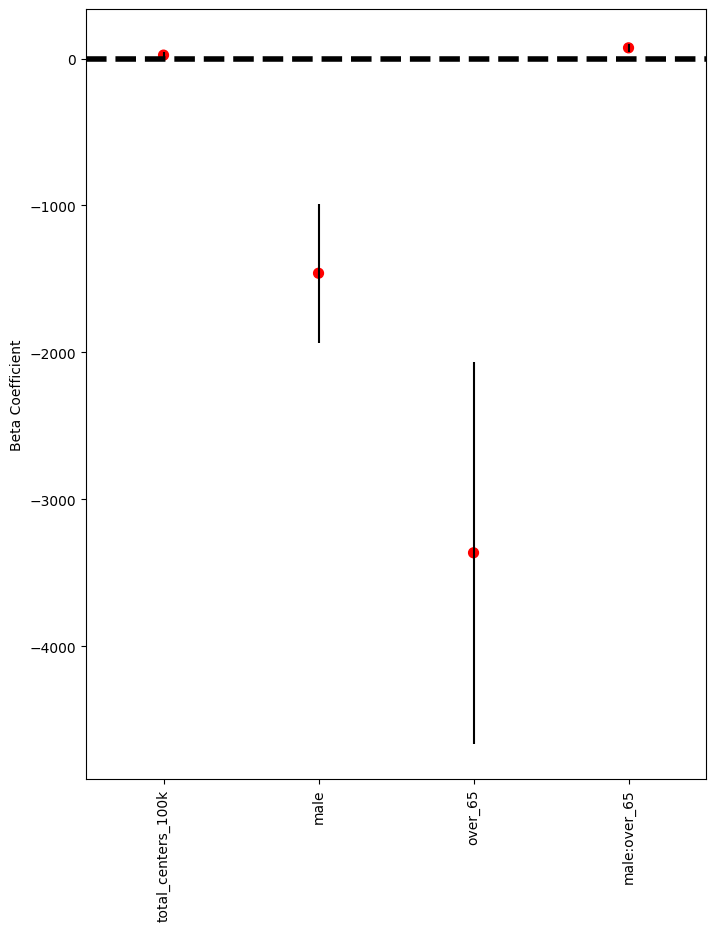

In [176]:
# plot beta coefficients and standard error

fig, ax = plt.subplots(figsize=(8, 10))
colors = np.where(regression_df["significant"], "red", "black")
regression_df.plot(
    x="variables",
    y="coefficient",
    kind="bar",
    ax=ax,
    color="none",
    yerr="conf_int",
    legend=False,
)
ax.set_ylabel("Beta Coefficient")
ax.set_xlabel("")
ax.scatter(
    x=np.arange(regression_df.shape[0]),
    marker="o",
    s=50,
    y=regression_df["coefficient"],
    color=colors,
)
ax.axhline(y=0, linestyle="--", color="black", linewidth=4)
ax.set_xticklabels(
    [
        "Total centers per 100K",
        "Trump votes",
        "Male",
        "Over 65",
        "Not White Alone",
        "Hispanic",
        "College Degree",
        "Median Income",
    ],
    rotation=90,
    fontsize=16,
)
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

ax.text(
    -1,
    1,
    "Beta Coefficients and 95% CI of Predictor Variables",
    va="center",
    rotation="vertical",
    fontsize=18,
    fontweight="bold",
)

plt.setp(ax.get_yticklabels(), rotation=90)

Text(0.5, 1.0, 'Relationship between number of clinics and bivalent uptake')

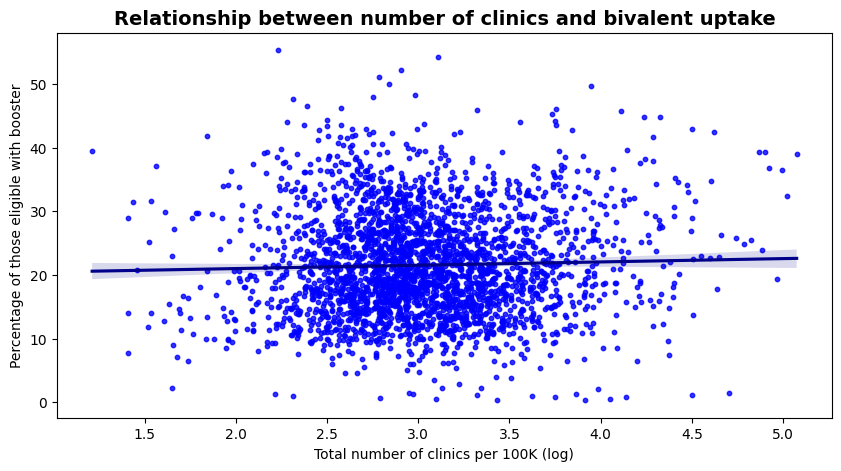

In [ ]:
# graph the relationsip between clinics and bivalent uptake
## this figure does not account for any covariates

fig, ax = plt.subplots(figsize=(10, 5), dpi=100)

sns.regplot(
    data=merged_df,
    x="total_centers_100k_log",
    y="bivalent_18plus_pct_elig",
    color="darkblue",
    scatter_kws={"color": "blue", "s": 10},
)
ax.set(
    xlabel="Total number of clinics per 100K (log)",
    ylabel="Percentage of those eligible with booster",
)
ax.set_title(
    "Relationship between number of clinics and bivalent uptake",
    fontsize=14,
    fontweight="bold",
)

In [ ]:
# create a correlation matrix dataframe

matrix_df = final_df[
    [
        "bivalent_18plus_pct_elig",
        "total_centers_100k",
        "biden",
        "male",
        "over_65",
        "not_white_alone",
        "hispanic",
        "degree",
        "median_household_income_in_the_past_12_months",
        "km2_area",
        "ac_1",
        "ac_2",
        "ac_3",
        "ac_4",
        "ac_5",
        "ac_6",
    ]
]

corr_matrix = matrix_df.corr()

Text(0.5, 1.0, 'Correlation Matrix')

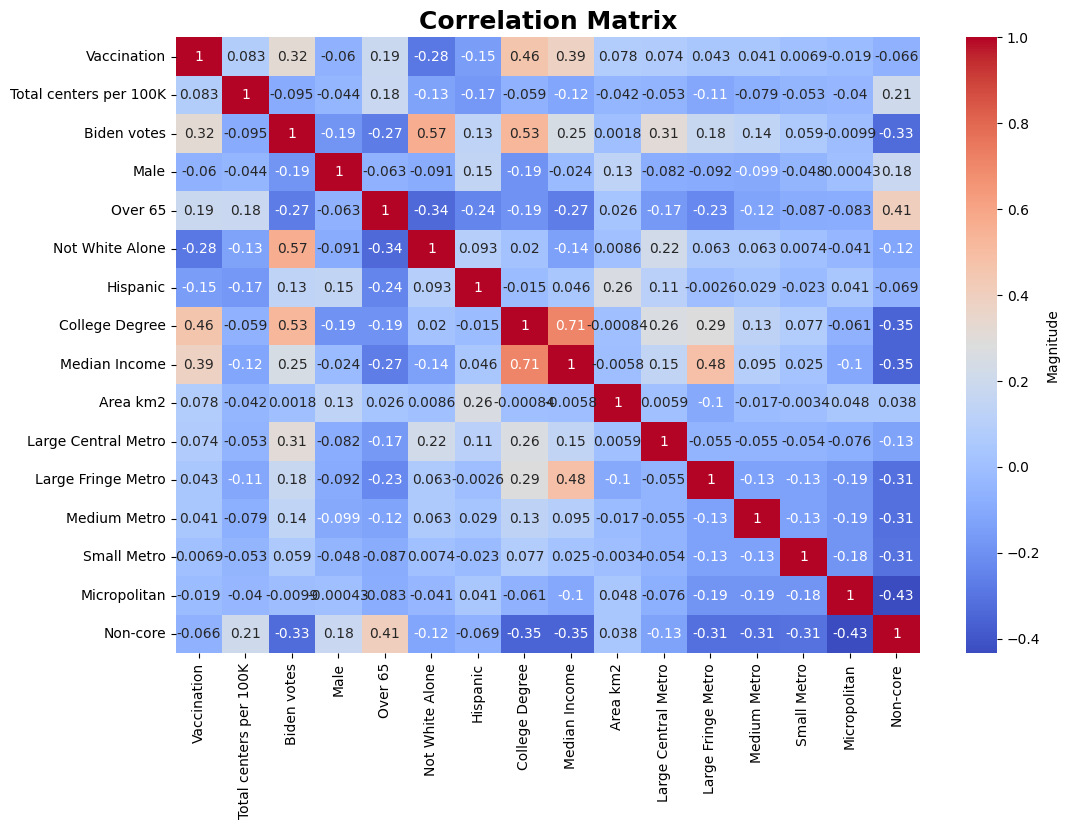

In [ ]:
# correlation matrix visualization

tick_labels = [
    "Vaccination",
    "Total centers per 100K",
    "Biden votes",
    "Male",
    "Over 65",
    "Not White Alone",
    "Hispanic",
    "College Degree",
    "Median Income",
    "Area km2",
    "Large Central Metro",
    "Large Fringe Metro",
    "Medium Metro",
    "Small Metro",
    "Micropolitan",
    "Non-core",
]

fig, ax = plt.subplots(figsize=(12, 8))

heatmap = sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

heatmap.collections[0].colorbar.set_label("Magnitude")

xticklabels = [tick.get_text() for tick in plt.gca().get_xticklabels()]
yticklabels = [tick.get_text() for tick in plt.gca().get_yticklabels()]

plt.gca().set_xticklabels(tick_labels)
plt.gca().set_yticklabels(tick_labels)

ax.set_title("Correlation Matrix", loc="center", fontsize=18, fontweight="bold")

In [ ]:
final_map = pd.merge(us_map, final_df, on="GEOID", how="left")

In [ ]:
# create a column with an interaction of multiple predictor variables

final_map["interaction"] = (
    final_map.bivalent_18plus_pct.values
    * final_map.biden.values
    * final_map.km2_area.values
)

(24.0, 51.0)

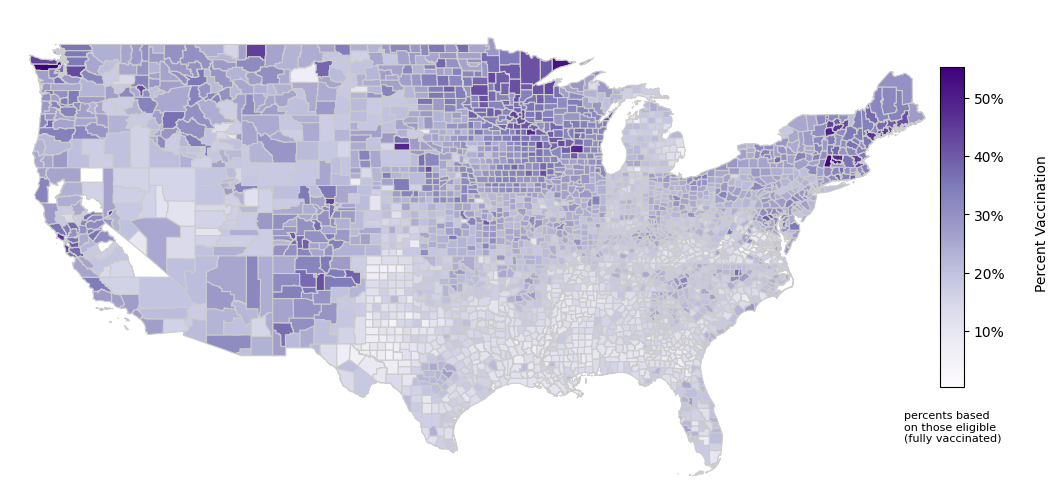

In [ ]:
# plot the vaccination coverage on a map of the US

fig, ax = plt.subplots(figsize=(12, 8))
final_map.plot(
    column="bivalent_18plus_pct_elig",
    cmap="Purples",
    linewidth=0.8,
    ax=ax,
    edgecolor="0.8",
)

vmin, vmax = (
    final_map["bivalent_18plus_pct_elig"].min(),
    final_map["bivalent_18plus_pct_elig"].max(),
)
sm = plt.cm.ScalarMappable(cmap="Purples", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar_ax = fig.add_axes([0.9, 0.32, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax, format="%d%%")
cbar_ax.text(
    -1.5,
    -6.5,
    "percents based\non those eligible\n(fully vaccinated)",
    ha="left",
    va="center",
    fontsize=8,
)

ax.set_axis_off()

ax.text(
    -59, 35, "Percent Vaccination", fontsize=10, ha="right", va="bottom", rotation=90
)

ax.set_xlim([-126, -66])
ax.set_ylim([24, 51])

(24.0, 51.0)

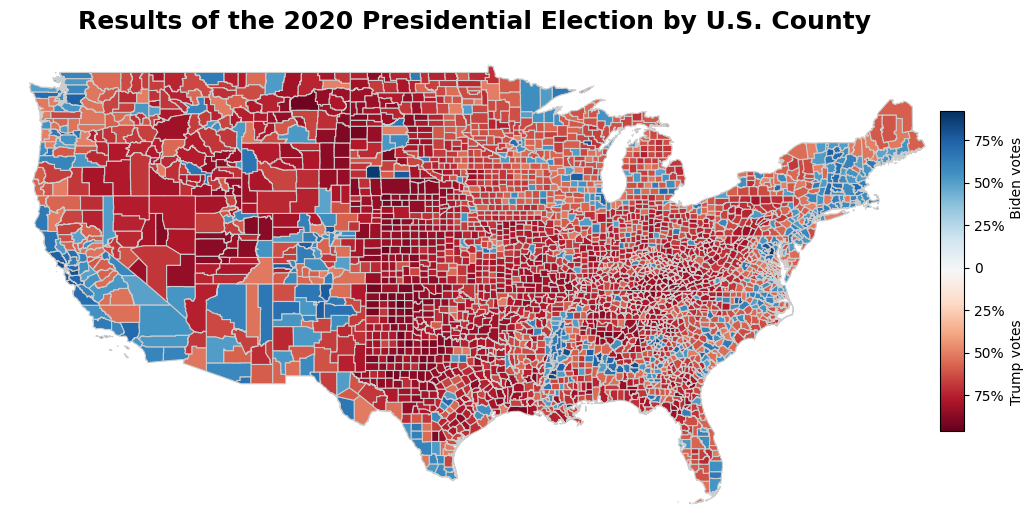

In [ ]:
# plot the presidential election on a map of the US

from matplotlib import ticker

fig, ax = plt.subplots(figsize=(12, 8))
final_map.plot(
    column="winner_coded", cmap="RdBu", linewidth=0.8, ax=ax, edgecolor="0.8"
)

vmin, vmax = (
    final_map["winner_coded"].min(),
    final_map["winner_coded"].max(),
)

sm = plt.cm.ScalarMappable(cmap="RdBu", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []

cbar_ax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
cbar = fig.colorbar(sm, cax=cbar_ax, format="%.0f%%")
cbar.set_label("Trump votes                       Biden votes")

cbar.ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: str(abs(int(x))) + "%" if x != 0 else "0")
)

ax.set_title(
    "Results of the 2020 Presidential Election by U.S. County",
    fontsize=18,
    fontweight="bold",
)
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([24, 51])

(24.0, 51.0)

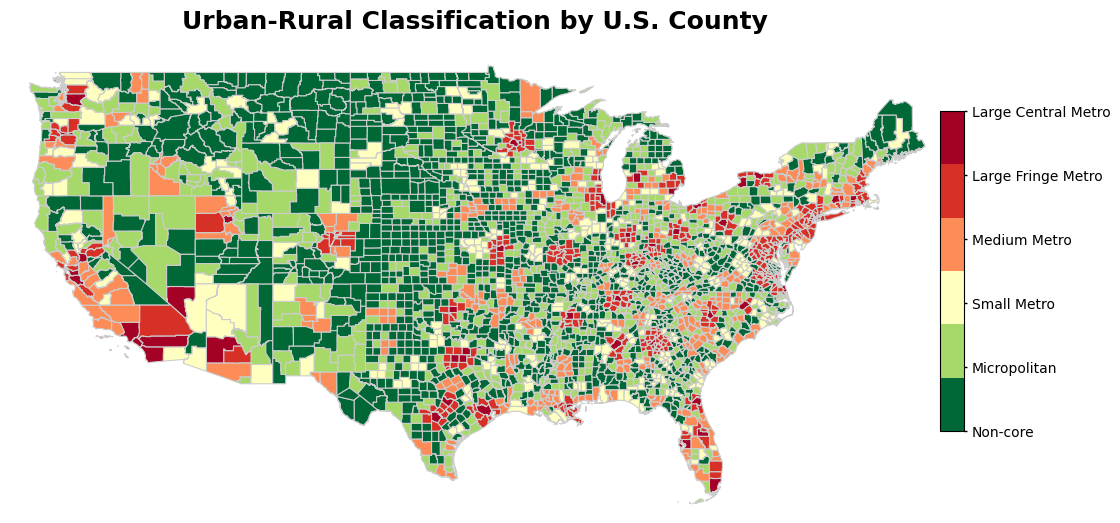

In [ ]:
# plot urban-rural classification

label_dict = {
    1: ("Large Central Metro", "#a50026"),
    2: ("Large Fringe Metro", "#d73027"),
    3: ("Medium Metro", "#fc8d59"),
    4: ("Small Metro", "#ffffbf"),
    5: ("Micropolitan", "#a6d96a"),
    6: ("Non-core", "#006837"),
}

cmap = ListedColormap([val[1] for val in label_dict.values()])
norm = plt.Normalize(vmin=1, vmax=len(label_dict))

# plot the urban_rural classification on a map of the US
fig, ax = plt.subplots(figsize=(12, 8))
final_map.plot(column="area_code", cmap=cmap, linewidth=0.8, ax=ax, edgecolor="0.8")

ticks = np.arange(len(label_dict)) + 1

ticklabels = [val[0] for val in label_dict.values()]

cbar_ax = fig.add_axes([0.9, 0.3, 0.02, 0.4])
cbar = fig.colorbar(
    plt.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax, ticks=ticks
)
cbar.ax.set_yticklabels(ticklabels)
cbar.ax.tick_params(direction="out", length=2, width=1, colors="black", labelsize=10)
cbar.ax.invert_yaxis()

ax.set_title(
    "Urban-Rural Classification by U.S. County", fontsize=18, fontweight="bold"
)
ax.set_axis_off()

ax.set_xlim([-126, -66])
ax.set_ylim([24, 51])

In [ ]:
# rename centers variable

# centers["center"] = centers.center.replace({"both" : "Both COVID and flu vaccines (n=29420)", "covid" : "Only COVID vaccines (n=19199)", "flu" : "Only flu vaccines (n=1544)"})

In [ ]:
centers

,latitude,longitude,center,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
0,34.008567,-96.382197,both,POINT (-96.38220 34.00857),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113
11822,34.000090,-96.409649,both,POINT (-96.40965 34.00009),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113
13880,33.994835,-96.389811,both,POINT (-96.38981 33.99484),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113
16690,34.000502,-96.413393,both,POINT (-96.41339 34.00050),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113
28065,33.932906,-96.425932,both,POINT (-96.42593 33.93291),518,40,013,01101794,0500000US40013,40013,Bryan,06,2342666324,102129113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57116,31.455462,-98.570277,covid,POINT (-98.57028 31.45546),211,48,333,01383952,0500000US48333,48333,Mills,06,1937867068,4022957
57140,30.431496,-84.976492,covid,POINT (-84.97649 30.43150),320,12,077,00308549,0500000US12077,12077,Liberty,06,2164099093,19582444
57190,39.783478,-98.771682,covid,POINT (-98.77168 39.78348),1691,20,183,00484969,0500000US20183,20183,Smith,06,2319241776,3884267
57200,32.608096,-87.318833,covid,POINT (-87.31883 32.60810),2425,01,105,00161579,0500000US01105,01105,Perry,06,1863900621,10937769


(24.0, 51.0)

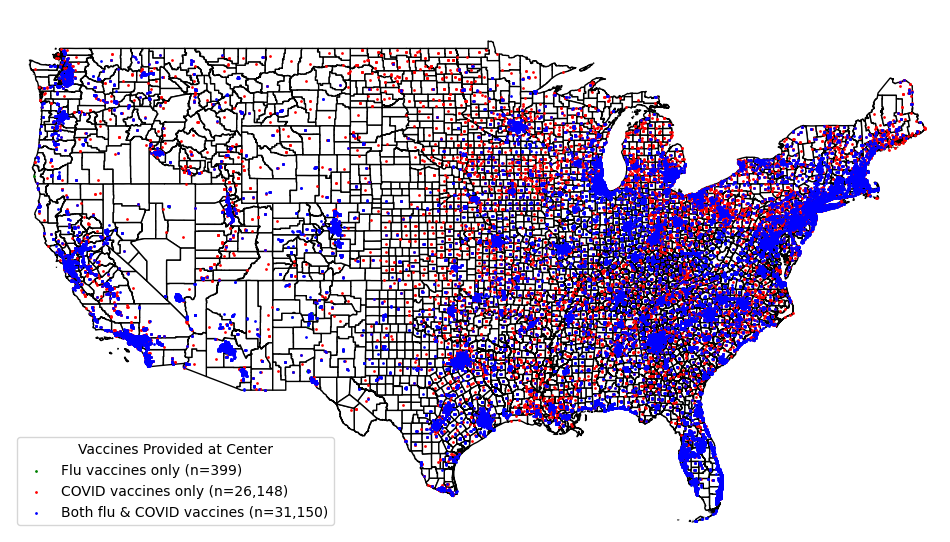

In [ ]:
# plot flu, covid, both centers onto map

center_colors = {"flu": "green", "covid": "red", "both": "blue"}

ax = us_map.plot(color="white", edgecolor="black", figsize=(12, 8))
for center, color in center_colors.items():
    centers[centers["center"] == center].plot(
        ax=ax, color=color, markersize=1, label=center
    )

ax.set_axis_off()
ax.legend(
    title="Vaccines Provided at Center",
    loc="lower left",
    labels=[
        "Flu vaccines only (n=399)",
        "COVID vaccines only (n=26,148)",
        "Both flu & COVID vaccines (n=31,150)",
    ],
)

ax.set_xlim([-126, -66])
ax.set_ylim([24, 51])